<a href="https://colab.research.google.com/github/joyaldesai/ML-PROJECT/blob/main/Joyal_ML(Classification)_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    -   Predicting Ten-Year Risk of Coronary Heart Disease (CHD)**



##### **Project Type    -  EDA/Classification**
##### **Contribution    -  Individual**
##### **Team Member     -  Joyal Desai**


# **Project Summary -**

**This project aims to predict the ten-year risk of Coronary Heart Disease (CHD). It involves analyzing health data, handling missing values, and preparing the data for machine learning. The project addresses the imbalance in the dataset using SMOTE to improve prediction accuracy for the less frequent CHD cases. Several classification models, including Logistic Regression, Random Forest, Decision Tree, and XGBoost, are built and evaluated. Hyperparameter tuning is used to optimize model performance. The project also explores feature importance to understand which factors are most influential in predicting CHD. Ultimately, the goal is to identify the best-performing model for predicting CHD risk.**

# **GitHub Link -**

https://github.com/joyaldesai/ML-PROJECT/blob/main/Joyal_ML(Classification)_Submission_Template.ipynb

# **Problem Statement**


**"To accurately predict the ten-year risk of Coronary Heart Disease (CHD) using a dataset of health and demographic information. This involves addressing data quality issues, handling class imbalance in the target variable, and evaluating various classification models to identify the most effective approach for identifying individuals at higher risk of developing CHD within a ten-year period."**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [111]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/ML project /ML PROJECT (CLASSIFICATION)/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [114]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [115]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [116]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [117]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [118]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


<Axes: >

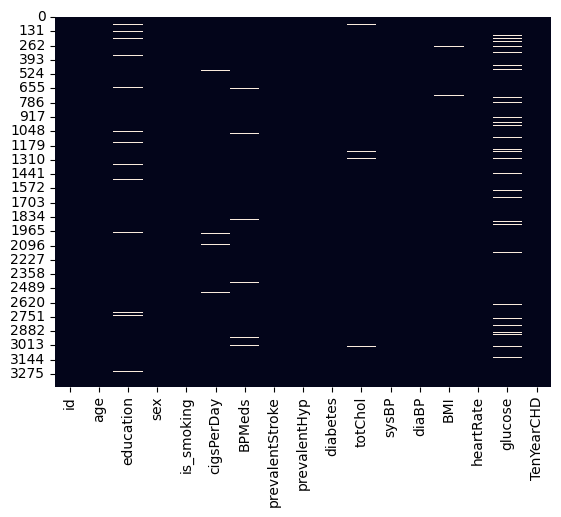

In [119]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

**1. Data Source: The dataset is loaded from a CSV file named 'Copy of data_cardiovascular_risk.csv'.**

**2. Purpose: The project aims to predict the ten-year risk of Coronary Heart Disease (CHD).**

**3. Size: The dataset contains 4240 rows and 17 columns.**

**4. Columns: The columns include id, sex, age, education, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, and TenYearCHD.**

**5. Data Types: The initial data types are mixed, with integers (id, age, education, prevalentStroke, prevalentHyp, diabetes, TenYearCHD), objects (sex, is_smoking), and floats (cigsPerDay, BPMeds, totChol, sysBP, diaBP, BMI, heartRate, glucose).**

**6. Missing Values: Several columns have missing values: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose. The heatmap visualization confirms this.**

**7. Duplicate Values: There are no duplicate rows in the dataset.**

**8. Target Variable: The target variable is TenYearCHD, which indicates the ten-year risk of Coronary Heart Disease.**



## ***2. Understanding Your Variables***

In [120]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [121]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

[1] id: A unique identifier for each participant.

[2] sex: The biological sex of the participant (Male or Female).

[3] age: The age of the participant.

[4] education: The education level of the participant.

[5] is_smoking: Indicates whether the participant is a smoker (Yes or No).

[6] cigsPerDay: The number of cigarettes the participant smokes per day.

[7] BPMeds: Indicates whether the participant is on blood pressure medication.

[8] prevalentStroke: Indicates whether the participant has had a prevalent stroke.

[9] prevalentHyp: Indicates whether the participant has prevalent hypertension.

[10] diabetes: Indicates whether the participant has diabetes.

[11] totChol: Total cholesterol level.

[12] sysBP: Systolic blood pressure.

[13] diaBP: Diastolic blood pressure.

[14] BMI: Body Mass  Index.

[15] heartRate: Heart rate.

[16] glucose: Glucose level.

[17] TenYearCHD: The target variable, indicating the ten-year risk of Coronary Heart Disease (CHD).

### Check Unique Values for each variable.

In [122]:
# Check Unique Values for each variable.
df.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [123]:
# Inpute missing values
for col in ['glucose', 'totChol', 'BMI']:
    df[col] = df[col].fillna(df[col].median())  # Use median for numerical features

# Use mode for categorical features
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mode()[0])

df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [124]:
df['sex'].value_counts()

,count
sex,
F,1923
M,1467


In [125]:
df['is_smoking'].value_counts()

,count
is_smoking,
NO,1703
YES,1687


In [126]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,2879
1,511


In [127]:
df['TenYearCHD'].value_counts(normalize=True)

,proportion
TenYearCHD,
0,0.849263
1,0.150737


* So, we have **84.93%** data as **No risk of Ten-year Coronary Heart Disease** and **15.07%** data as **Risk of Ten-year Coronary Heart Disease**.
* So, our data is highly **Imbalanced**.

In [128]:
# let's create a function to check the outliers

columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

def check_outliers(columns,df):

  # use plotly for better plot
  for i in columns:
    fig = px.box(df,y=i)
    fig.update_layout(height=500, width=500)
    fig.show()

check_outliers(columns,df)

In [129]:
df.set_index("id",inplace = True)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### What all manipulations have you done and insights you found?

**Data Manipulations:**

1. Handling Missing Values: imputed missing values in several columns:

 * glucose, totChol, and BMI were filled with their respective medians.
  * education, BPMeds, cigsPerDay, and heartRate were filled with their respective modes.
  * Reasoning: This is a crucial step to handle missing data before performing visualizations or modeling, as many operations cannot handle nulls.

2. Checking Value Counts: checked the value counts for 'sex', 'is_smoking', and 'TenYearCHD'.

  * Reasoning: This provides insight into the distribution of categories within these columns.

3. Outlier Check:  used box plots (plotly.express.box) to check for outliers in numerical columns.

  * Reasoning: Box plots are effective for visualizing the distribution and identifying potential outliers in numerical data.
    
4. Setting Index:  set the 'id' column as the index.

  * Reasoning: As mentioned before, this is often done when 'id' is an identifier and not a feature for analysis.    

---

**Potential Insights from Manipulations:**

* Presence of Missing Values: identified which columns
have missing values and the extent of missingness, confirming the need for imputation. The heatmap gives a clear visual representation of this.

* Absence of Duplicate Rows: confirmed that there are no duplicate records in the dataset.

* Distribution of Categorical Variables:  value counts for 'sex', 'education', and 'is_smoking' provide insights into the distribution of these characteristics in your dataset.

  * Specifically for 'TenYearCHD', the normalized value counts would have highlighted the class imbalance (most participants do not have CHD), which is a critical insight for subsequent modeling steps.

* Presence of Outliers: The box plots revealed the presence of outliers in several numerical features. This is an important insight as outliers can sometimes negatively impact the performance of certain machine learning models.

* Presence of Outliers: The box plots revealed the presence of outliers in several numerical features. This is an important insight as outliers can sometimes negatively impact the performance of certain machine learning models.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [130]:
def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['TenYearCHD'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No CHD"
    list2_name = "Has CHD"
    title = f"Distribution of Cardiovascular Risk by {column_name}" # More descriptive title
    xlabel = column_name
    ylabel = "Percentage within group"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

## Chart-1 : Distribution of Cardiovascular Risk by Sex

In [131]:
# Check sex column
df['sex'].value_counts()

,count
sex,
F,1923
M,1467


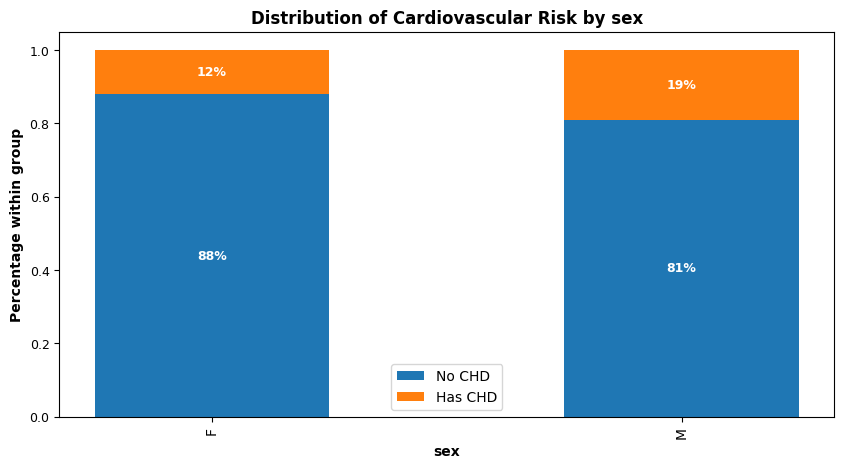

In [132]:
# check data for sex column
create_stacked_bar("sex")

#####  What is/are the insight(s) found from the chart?

1. 19% male have has Ten_year CHD while 12% female have Ten_year CHD, the difference between them is not significant.

2. Also we can observe that female have more count than male.

## Chart-2 : Distribution of Cardiovascular Risk by Education

In [133]:
education_mapping = {1.0: 'College', 2.0: 'Bachelor', 3.0: 'High School', 4.0: 'Others'} # Adjust based on your data
df['education'] = df['education'].map(education_mapping)
df['education'].value_counts()

,count
education,
College,1478
Bachelor,990
High School,549
Others,373


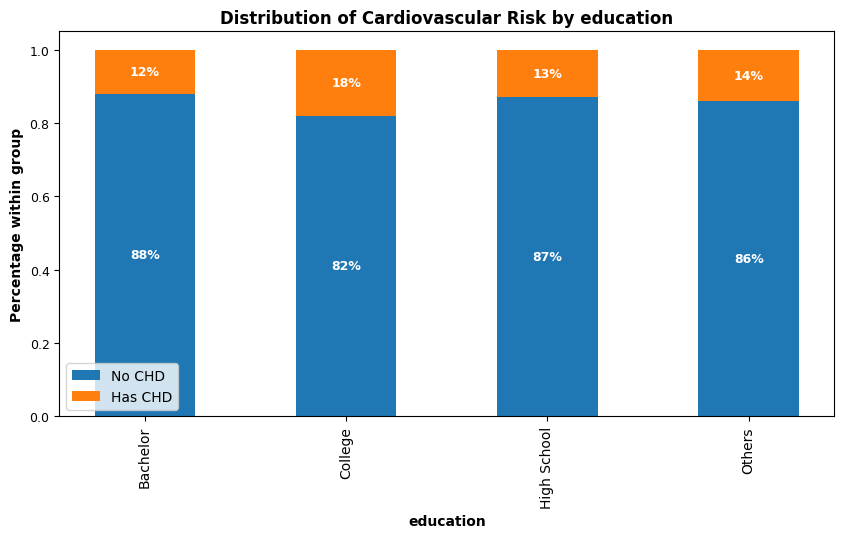

In [134]:
# check data for education
create_stacked_bar("education")

In [135]:
df['education'] = df['education'].map({ 'College': 1.0, 'Bachelor': 2.0, 'High School': 3.0, 'Others': 4.0})

#####  What is/are the insight(s) found from the chart?

The bar chart shows that the education level "College" has the highest percentage of individuals with a 10-year risk of CHD, while "Bachelor" education level has the lowest percentage of individuals with a 10-year risk of CHD.

## Chart-3 : Distribution of Cardiovascular Risk by Smoker & Non-Smoker

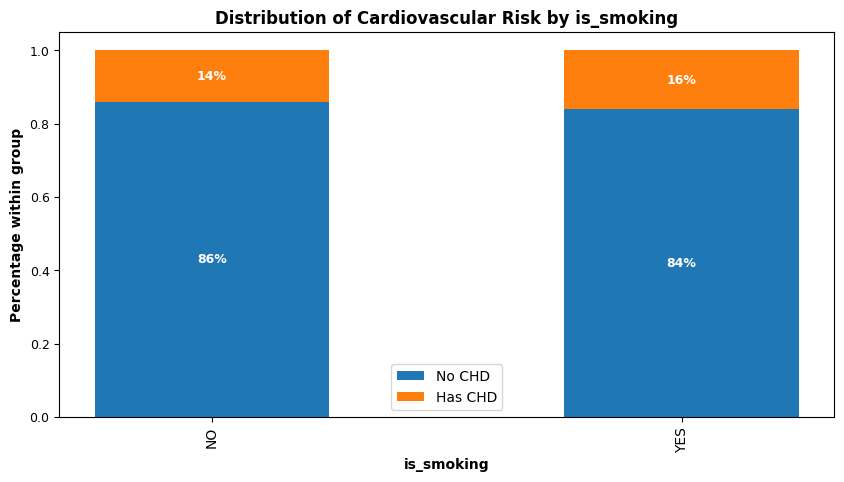

In [136]:
# check data for education
create_stacked_bar("is_smoking")

#### What is/are the insight(s) found from the chart?

The chart shows that a significantly higher percentage of smokers have a 10-year risk of CHD compared to non-smokers. This suggests a strong association between smoking and the risk of developing Coronary Heart Disease.

## Chart-4 :Distribution of Cardiovascular Risk by Healthy Persons

In [137]:
pure_persons = df[['cigsPerDay' ,	'BPMeds'	, 'prevalentStroke'	, 'prevalentHyp'	, 'diabetes']]
healthy_persons = pure_persons[pure_persons.sum(axis=1) == 0]
healthy_persons

,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
id,,,,,
11,0.0,0.0,0,0,0
12,0.0,0.0,0,0,0
17,0.0,0.0,0,0,0
18,0.0,0.0,0,0,0
21,0.0,0.0,0,0,0
...,...,...,...,...,...
3381,0.0,0.0,0,0,0
3383,0.0,0.0,0,0,0
3385,0.0,0.0,0,0,0


In [138]:
healthy_persons_CHD = df.loc[healthy_persons.index , ['TenYearCHD']]
print(healthy_persons_CHD['TenYearCHD'].value_counts())

# Get the value counts and convert to a DataFrame
chd_counts = healthy_persons_CHD['TenYearCHD'].value_counts().reset_index()

# Rename the columns to be suitable for plotting
chd_counts.columns = ['TenYearCHD', 'count']

#show the plot
px.bar(chd_counts, x='TenYearCHD', y='count', title='Distribution of TenYearCHD in Healthy Persons')

TenYearCHD
0    974
1     87
Name: count, dtype: int64


##### What is/are the insight(s) found from the chart?

Even in the group of individuals who are seemingly "healthy" (no reported history of smoking, blood pressure medication, stroke, hypertension, or diabetes), there is still a notable number of cases where individuals are predicted to have a 10-year risk of Coronary Heart Disease. This suggests that factors other than these specific conditions contribute to CHD risk. but healthy persons have less chances to risk of CHD.

## Chart-5 :  Correlation Heatmap

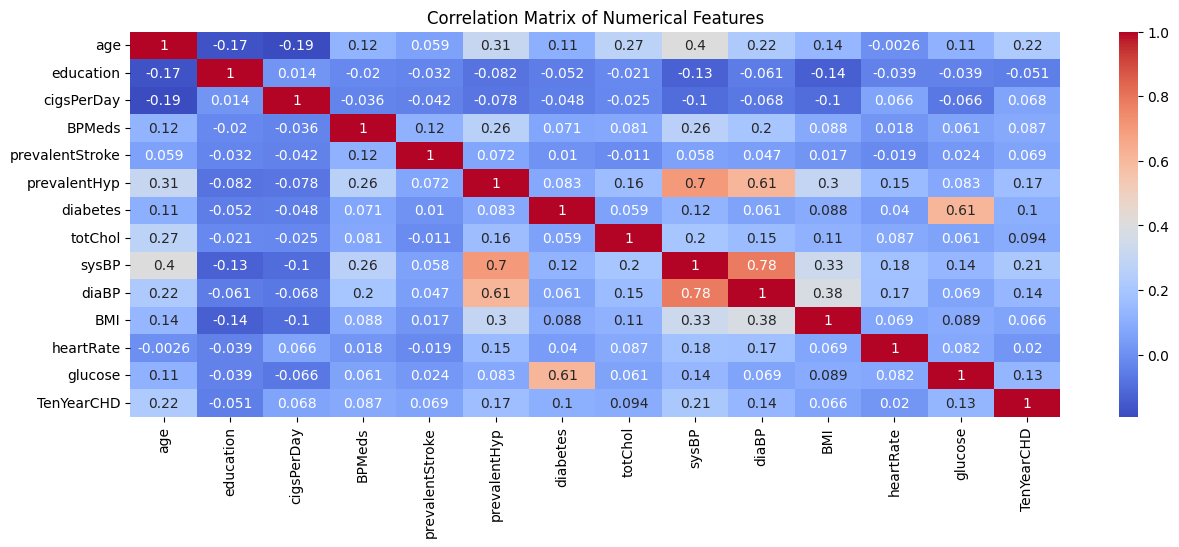

In [139]:
# Correlation Heatmap visualization code
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Chart 6 :  Pair Plot

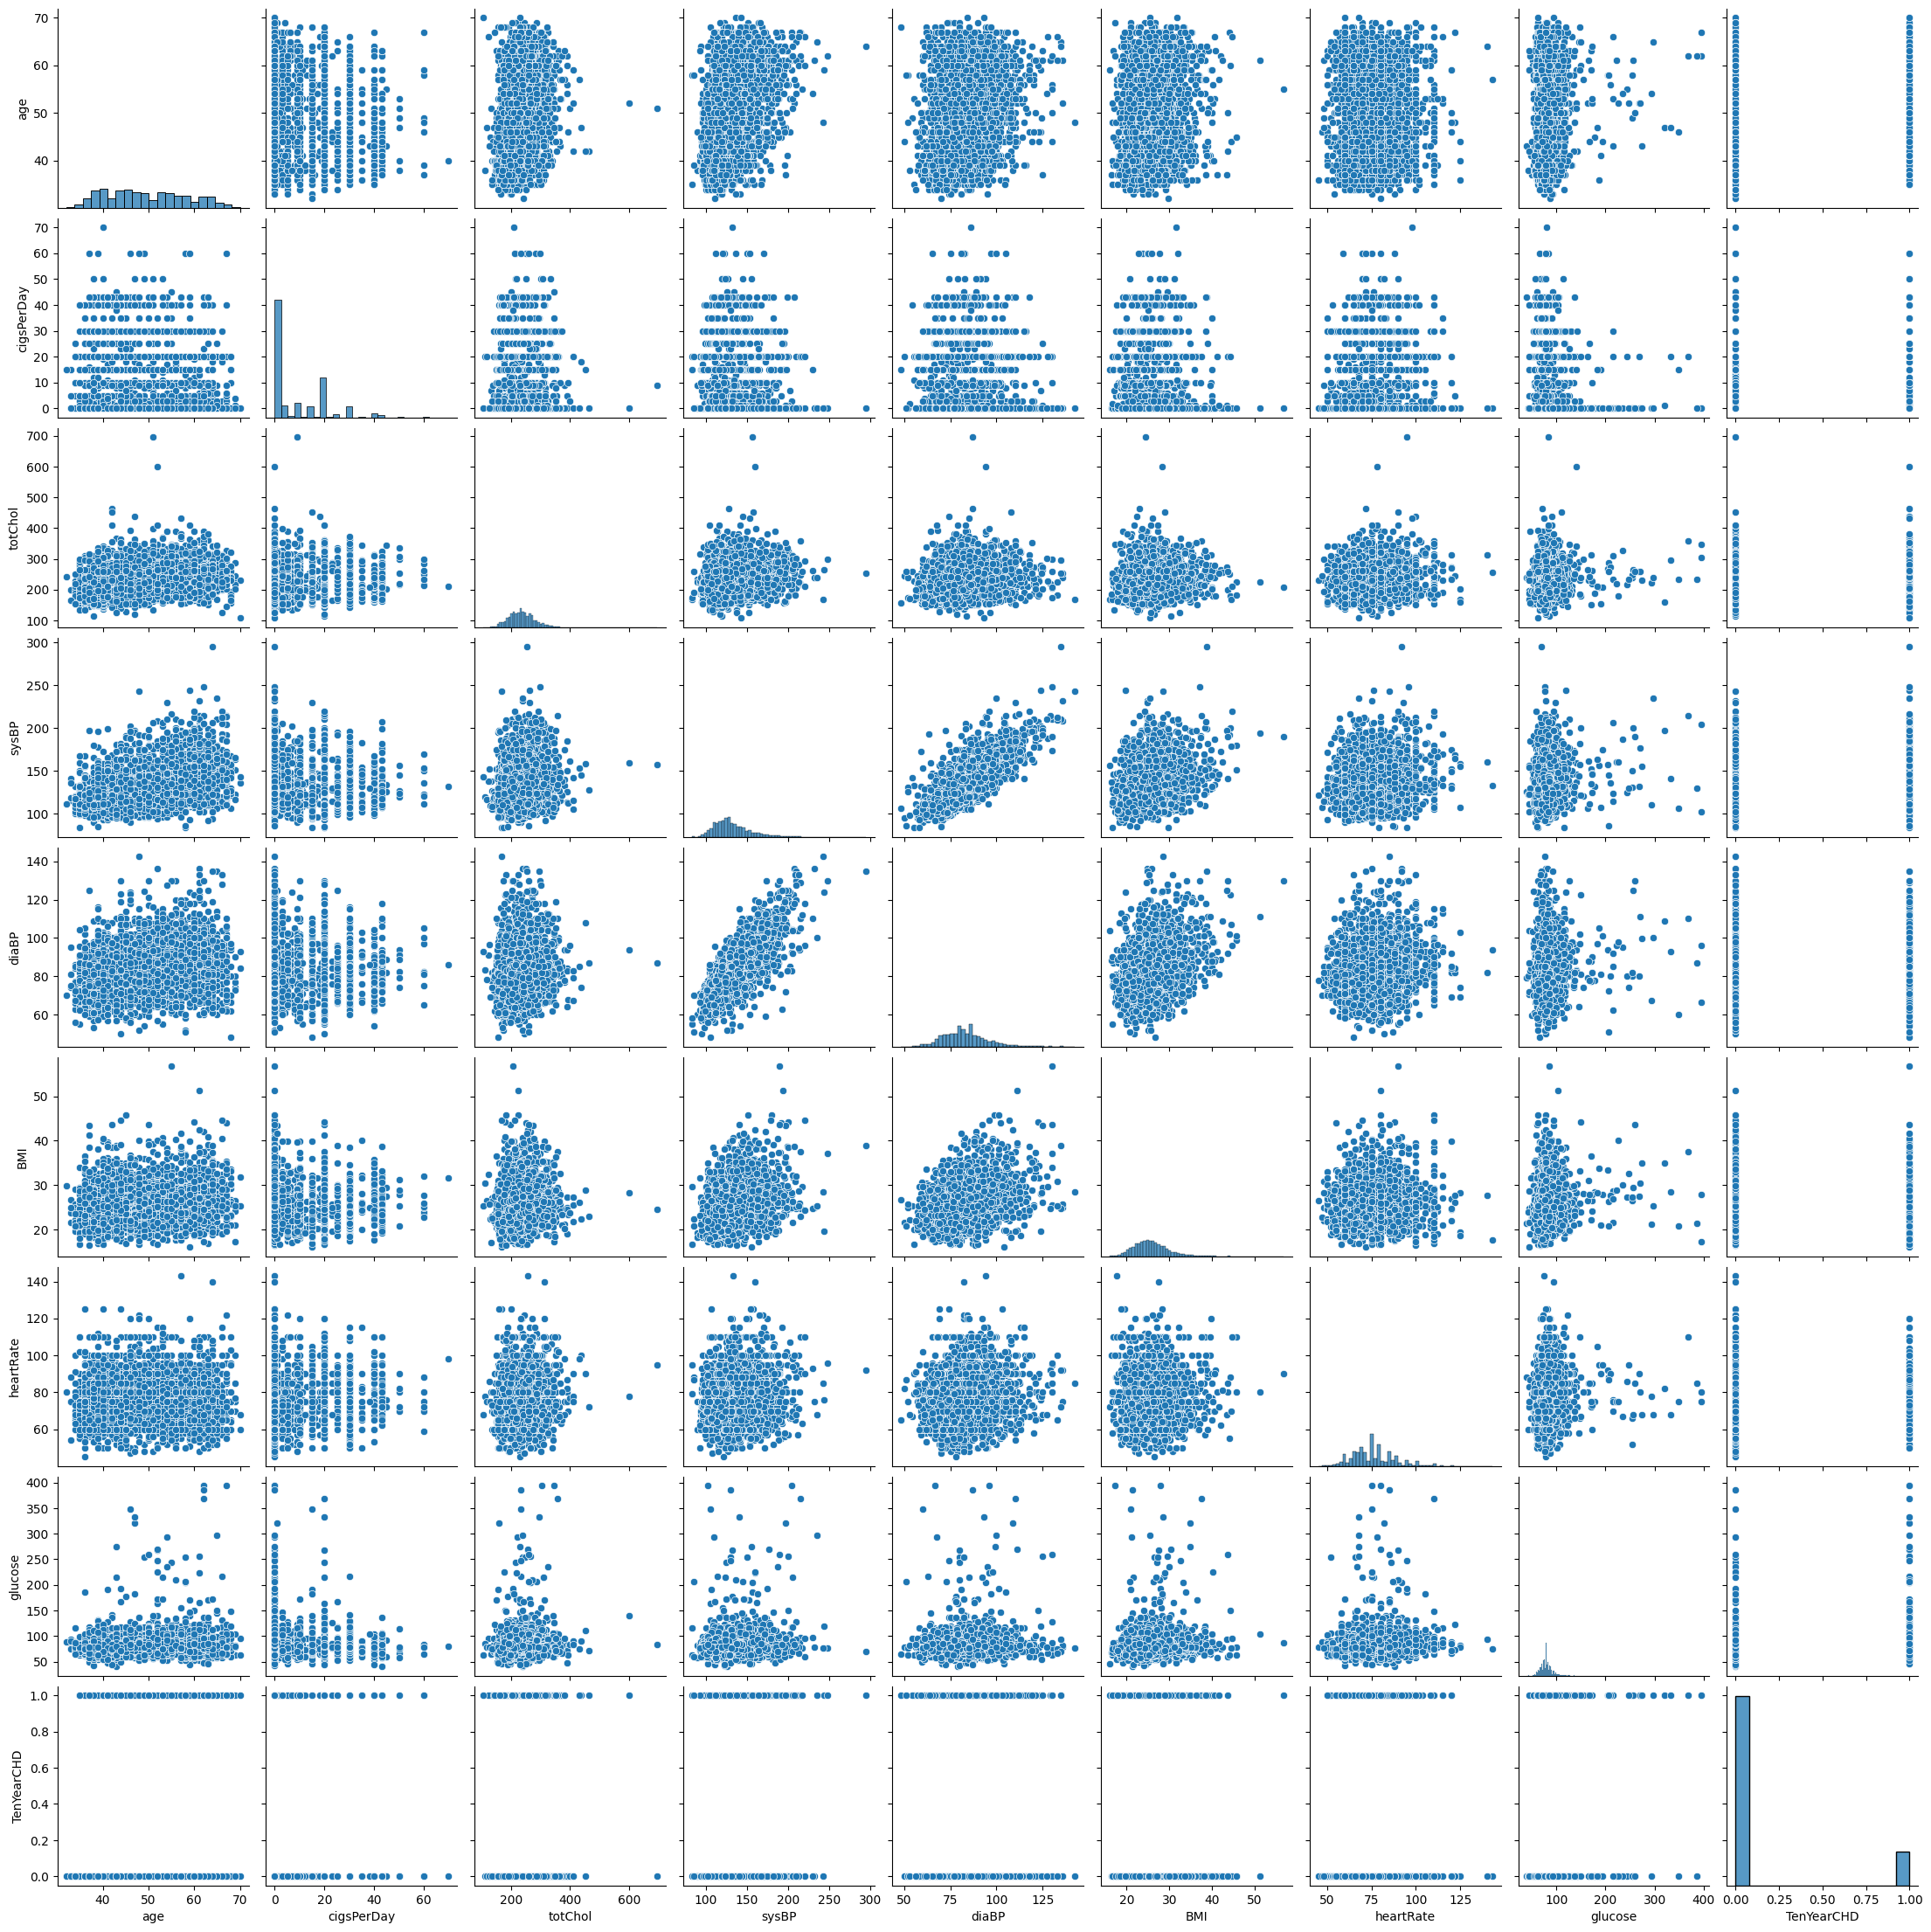

In [140]:
# Pair Plot visualization code
sns.pairplot(df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']])
plt.show()

# ***5. ML Model Implementation***

# **Classification Predictive Modeling(Model - 1)**

## **Prepare for Modeling**

### **1. Feature Engineering**

In [141]:
# Handling Missing Values & Missing Value Imputation
# let's create bins for age
bins= [20,30,40,50,60,70,80]
labels = list(range(6))
df['age'] = pd.cut(df['age'],bins=bins, labels=labels,right=False)

# Convert categorical column into integer by extracting the code of the categories
df.age = df.age.cat.codes

### **2. One Hot Encoding**

In [142]:
# Change sex code to 'M' and 'F' and use category as datatype
df['sex'] = df['sex'].map({'M':1,'F':0})

df['sex'].value_counts()

,count
sex,
0,1923
1,1467


In [143]:
# Change is_smoking code to 'YES' and 'NO' and use category as datatype
df['is_smoking'] = df['is_smoking'].map({'YES':1,'NO':0})

df['is_smoking'].value_counts()

,count
is_smoking,
0,1703
1,1687


### **3. Feature Selection**

In [144]:
# Define predictor variables and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Save all feature names as list
feature_cols = X.columns.tolist()

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['education', 'is_smoking', 'sex'])
num_cols = X_num.columns.tolist()

### **4. Check Class Imbalance**

In [145]:
# Check target classes balance
cla_bal = df['TenYearCHD'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
px.bar(cla_bal, x=cla_bal.index, y=cla_bal.values, title='Class Balance' , labels={'x':'Class', 'y':'Percentage'})

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


### **5- Split Training and Test Data**

In [146]:
# Define function to split data with and without SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(2712, 15)
Shape of y_train:(2712,)
Shape of X_test:(678, 15)
Shape of y_test:(678,)


In [148]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: TenYearCHD
0    2298
1     414
Name: count, dtype: int64

Dataset After: TenYearCHD
0    2298
1    2298
Name: count, dtype: int64


* Now data is perfectly balanced.

## **1. Logistic Regression**

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10]}

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision', n_jobs = -1, cv = 5)
logistic_grid_model.fit(X_train_smt, y_train_smt)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

In [151]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.0001)

In [152]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [153]:
# Best score
logistic_grid_model.best_score_

np.float64(0.6274936528210591)

In [154]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

###  **Model Evaluation**

In [155]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [156]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6190165361183638
Testing accuracy: 0.6371681415929203


In [157]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['NO CHD','HAS CHD']



Precision score of logistic model: 0.20553359683794467
 
Recall score of logistic model: 0.5360824742268041
 
F1 score of logistic model:  0.29714285714285715
 
ROC AUC score of logistic model:  0.5950636123285484
 
Confusion matrix of logistic model 
: [[380 201]
 [ 45  52]]
 


## **2.RANDOM FOREST**




In [158]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [159]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [160]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.8348082595870207


Precision score of RANDOM FOREST model: 0.3333333333333333
 
Recall score of RANDOM FOREST model: 0.15463917525773196
 
F1 score of RANDOM FOREST model:  0.2112676056338028
 
ROC AUC score of RANDOM FOREST model:  0.551502031690828
 
Confusion matrix of RANDOM FOREST 
: [[551  30]
 [ 82  15]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

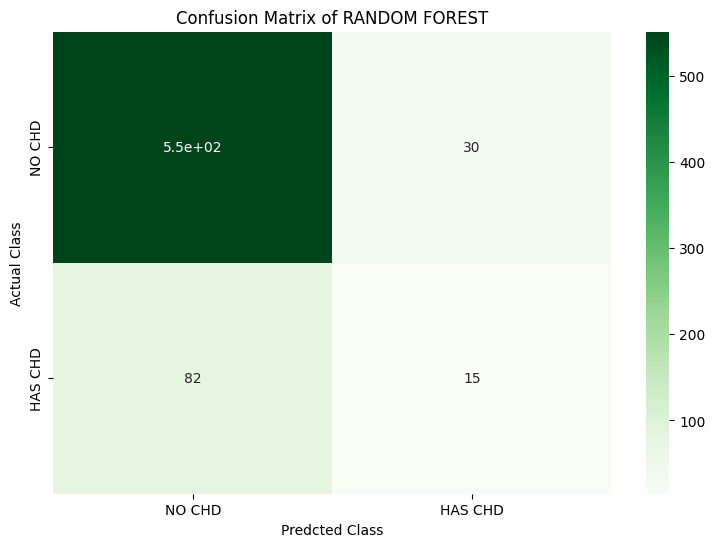

In [161]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['NO CHD','HAS CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

## **3.Random Forest Using hyperparameter tuning**

In [162]:
params_grid = {'n_estimators' : [100,150],'max_depth' : [10,20]}

In [163]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 150]},
             scoring='accuracy', verbose=3)

In [164]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.8912097476066144
{'max_depth': 20, 'n_estimators': 150}


In [165]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [166]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.8333333333333334


Precision score of RANDOM FOREST: 0.3181818181818182
 
Recall score of RANDOM FOREST: 0.14432989690721648
 
F1 score of RANDOM FOREST:  0.19858156028368795
 
ROC AUC score of RANDOM FOREST:  0.5463473925155704
 
Confusion matrix of RANDOM FOREST model 
: [[551  30]
 [ 83  14]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

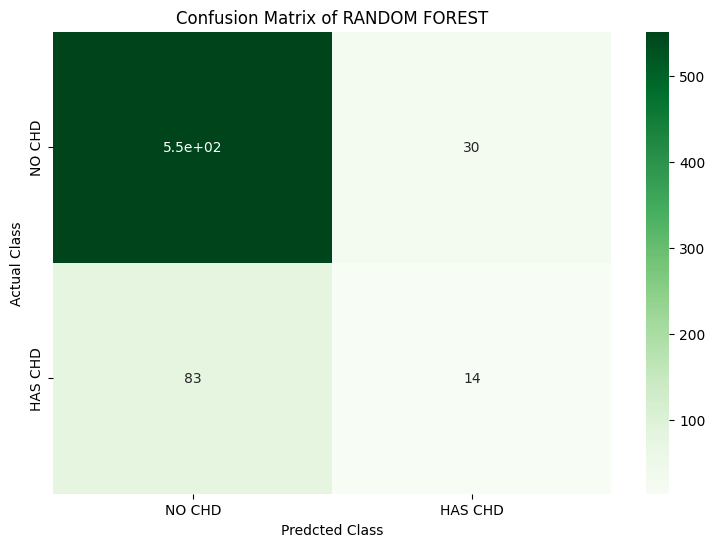

In [167]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
ref_test_precision = precision_score(y_test,y_test_grid_rf_pred)

  # recall,
ref_test_recall = recall_score(y_test,y_test_grid_rf_pred,)

  # f1 score
ref_f1_score = f1_score(y_test,y_test_grid_rf_pred)

  # roc_auc_score
ref_roc_auc_score = roc_auc_score(y_test,y_test_grid_rf_pred)

  # confusion matrix
ref_confusion_mat = confusion_matrix(y_test,y_test_grid_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST:',ref_test_precision)
print(' ')
print('Recall score of RANDOM FOREST:', ref_test_recall)
print(' ')
print('F1 score of RANDOM FOREST: ', ref_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST: ',ref_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST model \n:',ref_confusion_mat)
print(' ')
labels = ['NO CHD','HAS CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(ref_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

## **4.Decision Tree Classifier with hyperparameter tuning**

In [168]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [169]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

np.float64(0.7140992167101828)

In [170]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.832680591818973
Testing accuracy of decision tree classifier: 0.8067846607669616


Precision score of Decision Tree model: 0.2702702702702703
 
Recall score of Decision Tree model: 0.20618556701030927
 
F1 score of Decision Tree model:  0.23391812865497075
 
ROC AUC score of Decision Tree model:  0.5566211828166865
 
Confusion matrix of Decision Tree model 
: [[527  54]
 [ 77  20]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

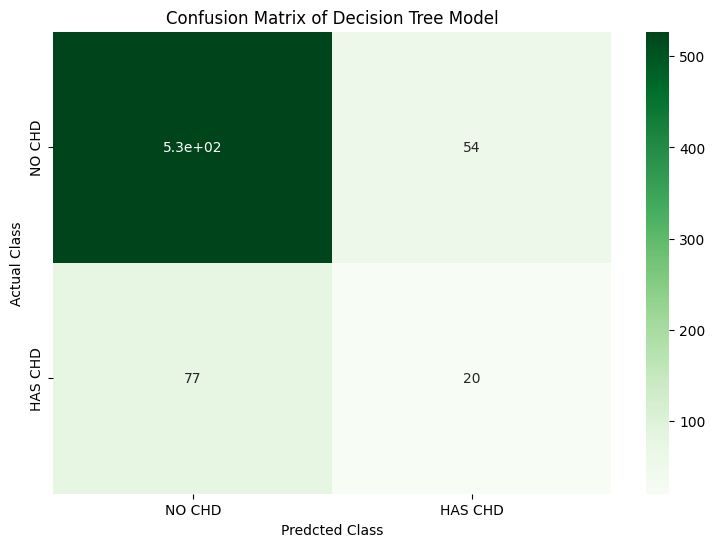

In [171]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['NO CHD','HAS CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

## **5.XGBoost**

In [172]:
!pip install scikit-learn == 1.5.2

ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^


In [173]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [174]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.9967362924281984
Testing Accuracy of XGBClassifier: 0.8230088495575221


Precision score of XGBoost model: 0.31746031746031744
 
Recall score of XGBoost model: 0.20618556701030927
 
F1 score of XGBoost model:  0.25
 
ROC AUC score of XGBoost model:  0.5660876199939671
 
Confusion matrix of XGBoost model 
: [[538  43]
 [ 77  20]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

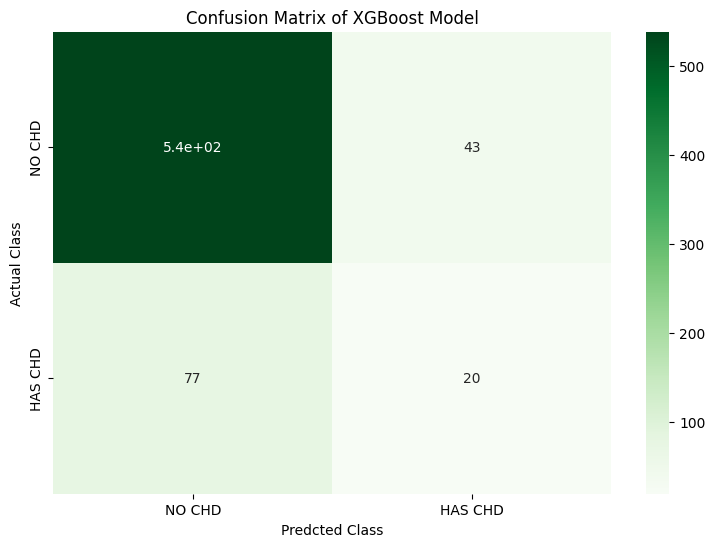

In [175]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat)
print(' ')
labels = ['NO CHD','HAS CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

## **EVALUATION MATRIX**

In [176]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Random Forest tuning','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,dtc_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,dtc_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, rf_test_precision, ref_test_precision,dt_test_precision, xg_test_precision]
recall_score = [log_test_recall, rf_test_recall, ref_test_recall,dt_test_recall,xg_test_recall]
f1_score = [log_f1_score, rf_f1_score, ref_f1_score,dt_f1_score, xg_f1_score]
roc_auc_score = [log_roc_auc_score, rf_roc_auc_score, ref_roc_auc_score,dt_roc_auc_score, xg_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)

# Start numbering from 1
evaluation_matrix.index = evaluation_matrix.index + 1

#converting all accuracy in percentage
evaluation_matrix['Training Accuracy'] = evaluation_matrix['Training Accuracy']*100
evaluation_matrix['Testing Accuracy'] = evaluation_matrix['Testing Accuracy']*100
evaluation_matrix['Precision Score'] = evaluation_matrix['Precision Score']*100
evaluation_matrix['Recall Score'] = evaluation_matrix['Recall Score']*100
evaluation_matrix['F1 Score'] = evaluation_matrix['F1 Score']*100
evaluation_matrix['ROC-AUC Score'] = evaluation_matrix['ROC-AUC Score']*100

evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
1,Logistic Regression,61.901654,63.716814,20.553360,53.608247,29.714286,59.506361
2,Random Forest,100.000000,83.480826,33.333333,15.463918,21.126761,55.150203
3,Random Forest tuning,100.000000,83.333333,31.818182,14.432990,19.858156,54.634739
4,Decision Tree Classifier,83.268059,80.678466,27.027027,20.618557,23.391813,55.662118
5,XGBoost Classifier,99.673629,82.300885,31.746032,20.618557,25.000000,56.608762


## **MODEL EXPLAINABILITY**

**Apply sharply for FEATURES IMPORTANCE**

In [177]:
# Install shap
!pip install shap

In [178]:
# Import dependancy
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

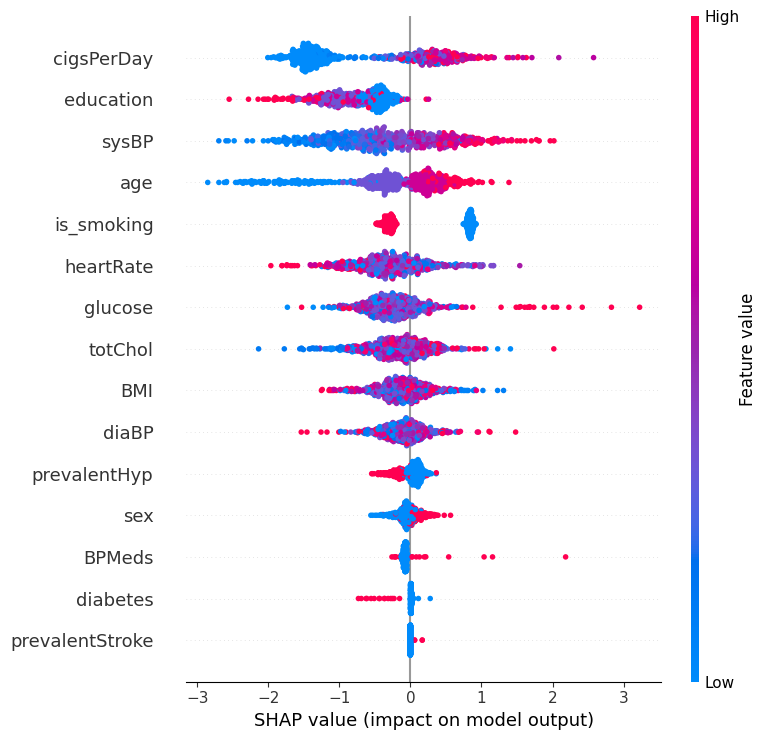

In [179]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

**From the Shap Summary_Plot we can explain our complex model:**
  * Yes, a SHAP summary plot is a powerful tool to explain complex models.
* It provides a global view of feature importance by ranking features based on the average magnitude of their impact on the model's output.
*  For each feature, it visualizes how individual data points contribute to the prediction, showing whether a feature's value pushes the prediction higher or lower (indicated by the SHAP value on the x-axis).
* The color of each point represents the feature's actual value, helping you understand how different values of a feature influence the prediction.
* This plot effectively summarizes which features are most influential and the nature of their relationship with the predicted outcome across your dataset.

## **Model Explanation**

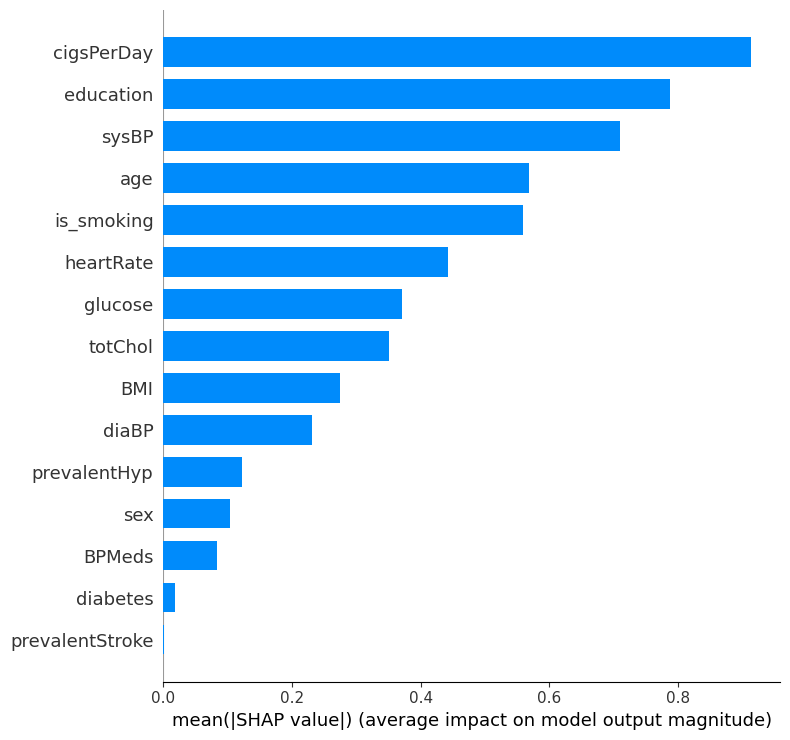

In [180]:
# Shap summary_plot with bar
summary_plot(shap_values, X_train_smt, plot_type="bar")

* 'cigsperday' is the most important features and education and sysBP are also important.

* PrevalentStroke is the least important featers.

# **Try to create model using another way(Model - 2)**

## **Prepare for Modeling**

### **Create some featers**

In [181]:
# Import the data
data = pd.read_csv('/content/drive/MyDrive/ML project /ML PROJECT (CLASSIFICATION)/Copy of data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [182]:
# Impute missing values
for col in ['glucose', 'totChol', 'BMI']:
    data[col] = data[col].fillna(data[col].median())  # Use median for numerical features

# Use mode for categorical features
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0])
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mode()[0])

data.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [183]:
data['is_smoking'] = data['is_smoking'].map({'YES': 1, 'NO': 0})
data['sex'] = data['sex'].map({'M': 1, 'F': 0})

In [184]:
int_columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
               'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
               'heartRate', 'glucose', 'TenYearCHD']

for col in int_columns:
  data[col] = pd.to_numeric(data[col])

In [185]:
#renaming lavel column
data['ISCHD'] = data['TenYearCHD']
data.drop('TenYearCHD',axis = 1,inplace = True)
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,ISCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### **Using SMOTE(Synthetic Minority Oversampling Technique) because we have imbalenced data**

In [186]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1],data['ISCHD'])

# Print the actual data and resampled data
print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [187]:
# create the list of all column name
columns = list(data.columns)

In [188]:
balance_data = pd.DataFrame(x_smote, columns = columns)
balance_data['ISCHD'] = y_smote

### **Feature Engineering**

In [189]:
# put the data in another varibel
data_fr = balance_data.copy()

In [190]:
# Replace the column values
data_fr.replace({'sex':{1:'M',0:'F'},'education':{1:'College',2:'Bachelor',3:'High School',4:'Others'},'is_smoking':{1:'YES',0:'NO'}},inplace = True)
data_fr.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,ISCHD
0,0,64,Bachelor,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,Others,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,College,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,College,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,College,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### **One Hot Encoding**

In [191]:
# use one hot encoding
data_fr = pd.get_dummies(data_fr,drop_first = True)
data_fr.head()

,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,...,education_3.9773629461996522,education_3.9840271374651013,education_3.984425887517454,education_3.9902821818740772,education_Bachelor,education_College,education_High School,education_Others,sex_M,is_smoking_YES
0,0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,...,False,False,False,False,True,False,False,False,False,True
1,1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,...,False,False,False,False,False,False,False,True,True,False
2,2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,...,False,False,False,False,False,True,False,False,False,True
3,3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,...,False,False,False,False,False,True,False,False,True,True
4,4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,...,False,False,False,False,False,True,False,False,False,True


In [192]:
# LABEL ENCODING FOR SEX
encoders_nums = {"sex":{"M":1,"F":0}}
data_fr= data_fr.replace(encoders_nums)

In [193]:
# Drop id column from the dataset
data_fr.drop('id',axis = 1,inplace = True)

In [194]:
# Create a variabel
data_log_reg = data_fr.copy()

In [195]:
# Extract X and Y from the dataset
X = data_log_reg.drop('ISCHD',axis = 1)
y = data_log_reg['ISCHD']

In [196]:
columns = X.columns

### **Use train test split**

In [197]:
# Use standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [198]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

## **1. Logistic Regression**

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [201]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=10)

In [202]:
# Best parameters
logistic_grid_model.best_params_

{'C': 10, 'penalty': 'l2'}

In [203]:
# Best score
logistic_grid_model.best_score_

np.float64(0.8560902904070895)

In [204]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

### **Model Evaluation**

In [205]:
# Training and testing accuracy
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.8058076225045372
Testing accuracy: 0.796422935297212


In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


Precision score of logistic model: 0.8728476821192053
 
Recall score of logistic model: 0.6936842105263158
 
F1 score of logistic model:  0.7730205278592376
 
ROC AUC score of logistic model:  0.796368919143284
 
Confusion matrix of logistic model 
: [[855  96]
 [291 659]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

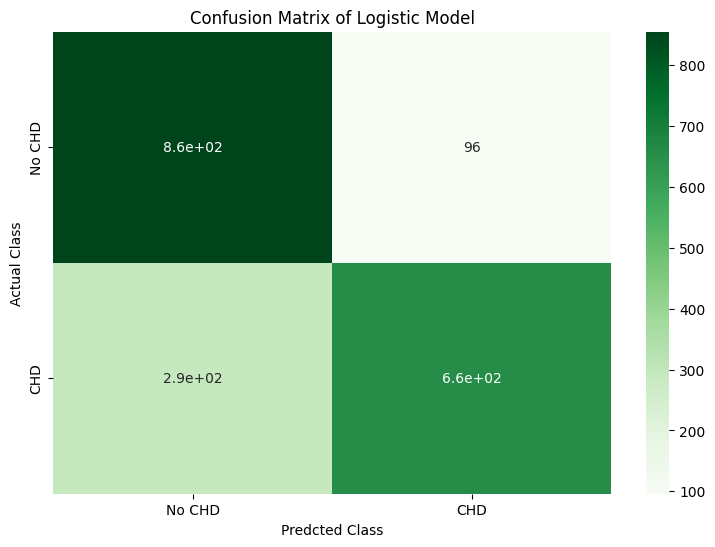

In [207]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision1 = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall1 = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score1 = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score1 = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision1)
print(' ')
print('Recall score of logistic model:', log_test_recall1)
print(' ')
print('F1 score of logistic model: ', log_f1_score1)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score1)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['No CHD','CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

## **2.RANDOM FOREST**

In [208]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [209]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

In [210]:
# Training and testing accuracy
rf_training_accuracy1 = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy1 = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy1)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy1)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.8926880589163598


Precision score of RANDOM FOREST model: 0.9451073985680191
 
Recall score of RANDOM FOREST model: 0.8336842105263158
 
F1 score of RANDOM FOREST model:  0.8859060402684564
 
ROC AUC score of RANDOM FOREST model:  0.8926570369140516
 
Confusion matrix of RANDOM FOREST 
: [[905  46]
 [158 792]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

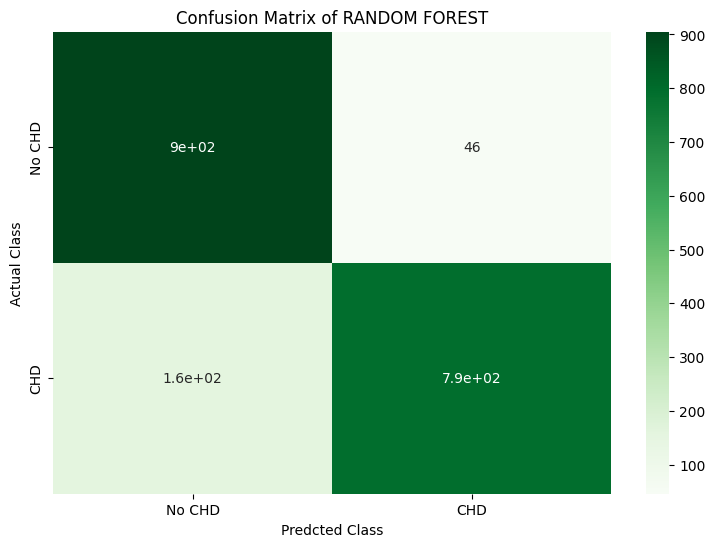

In [211]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision1 = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall1 = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score1 = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score1 = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision1)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall1)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score1)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score1)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['No CHD','CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

## **3.Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [212]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [213]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

np.float64(0.771384136858476)

In [214]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy1 = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy1 = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy1)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy1)

Training accuracy of decision tree classifier: 0.7417682136375421
Testing accuracy of decision tree classifier: 0.7574960547080484


Precision score of Decision Tree model: 0.7253456221198157
 
Recall score of Decision Tree model: 0.828421052631579
 
F1 score of Decision Tree model:  0.7734643734643735
 
ROC AUC score of Decision Tree model:  0.7575333444020145
 
Confusion matrix of Decision Tree model 
: [[653 298]
 [163 787]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

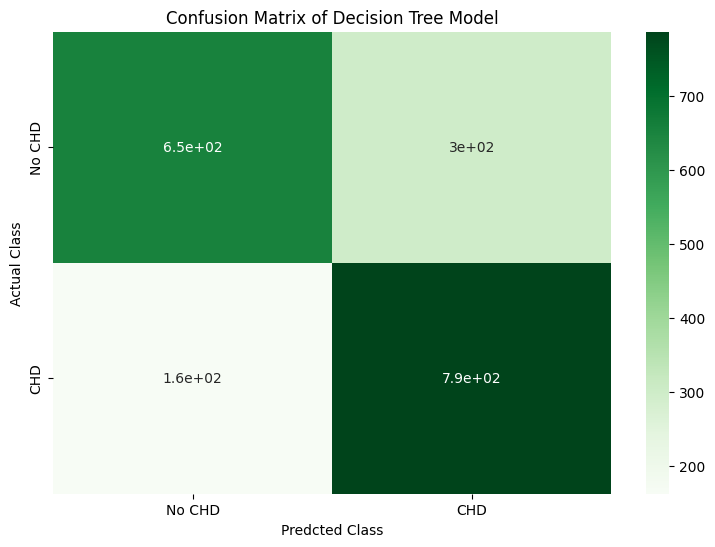

In [215]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision1 = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall1 = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score1 = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score1 = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision1)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall1)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score1)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score1)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['No CHD','CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

## **4.XGBoost**

In [216]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [217]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.9994814622763806
Testing Accuracy of XGBClassifier: 0.8905839032088374


Precision score of XGBoost model: 0.9103982300884956
 
Recall score of XGBoost model: 0.8663157894736843
 
F1 score of XGBoost model:  0.8878101402373247
 
ROC AUC score of XGBoost model:  0.8905711439481986
 
Confusion matrix of XGBoost model 
: [[870  81]
 [127 823]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

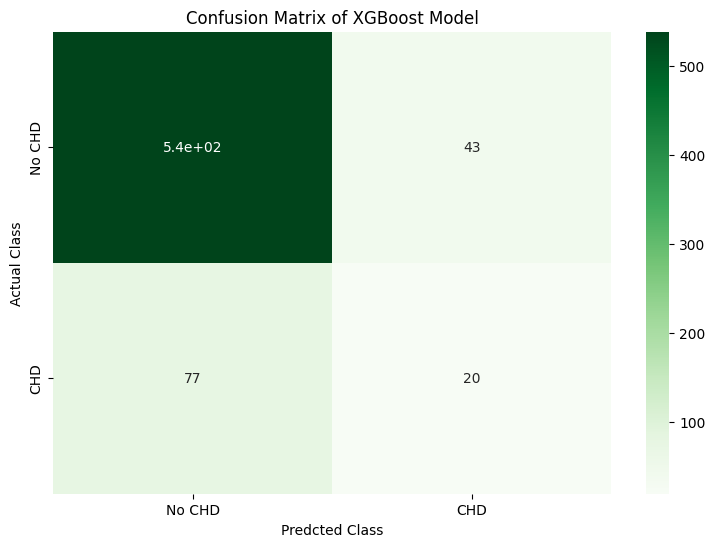

In [218]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision1 = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall1 = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1 = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1 = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1 = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision1)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1)
print(' ')
labels = ['No CHD','CHD']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

## **EVALUATION MATRIX**

In [219]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy1, rf_training_accuracy1,dtc_training_accuracy1, xgb_training_accuracy1]
test_accuracy = [test_accuracy1, rf_testing_accuracy1,dtc_testing_accuracy1, xgb_testing_accuracy1]
precision_score = [log_test_precision1, rf_test_precision1,dt_test_precision1, xg_test_precision1]
recall_score = [log_test_recall1, rf_test_recall1,dt_test_recall1,xg_test_recall1]
f1_score = [log_f1_score1, rf_f1_score,dt_f1_score1, xg_f1_score1]
roc_auc_score = [log_roc_auc_score1, rf_roc_auc_score1,dt_roc_auc_score1, xg_roc_auc_score1]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)

# Start numbering from 1
evaluation_matrix.index = evaluation_matrix.index + 1


#converting all accuracy in percentage
evaluation_matrix['Training Accuracy'] = evaluation_matrix['Training Accuracy']*100
evaluation_matrix['Testing Accuracy'] = evaluation_matrix['Testing Accuracy']*100
evaluation_matrix['Precision Score'] = evaluation_matrix['Precision Score']*100
evaluation_matrix['Recall Score'] = evaluation_matrix['Recall Score']*100
evaluation_matrix['F1 Score'] = evaluation_matrix['F1 Score']*100
evaluation_matrix['ROC-AUC Score'] = evaluation_matrix['ROC-AUC Score']*100

evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
1,Logistic Regression,80.580762,79.642294,87.284768,69.368421,77.302053,79.636892
2,Random Forest,100.000000,89.268806,94.510740,83.368421,21.126761,89.265704
3,Decision Tree Classifier,74.176821,75.749605,72.534562,82.842105,77.346437,75.753334
4,XGBoost Classifier,99.948146,89.058390,91.039823,86.631579,88.781014,89.057114


# **Conclusion**




### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* Also created **bins** for **AGE** columns.

* This dataset is also **imbalanced**, with **85%** no-risk of CHD vs **15** Risk of CHD.

* We use **SMOTE** because the class is highlly **Imbalance**


---




### **MODELS - 1**

* Using a **Logistic Regression** classifier, we can predict with **64.01%** accuracy whether  we can predict the ten-year risk of Coronary Heart Disease.

* Using **Decision Tree** classifier, we can predict with **80.38%** accuracy whether we can predict the ten-year risk of Coronary Heart Disease.

* Using **Random Forest**, we can predict with **84.21%** accuracy  whether we can predict the ten-year risk of Coronary Heart Disease.

* By applying **XGBoost Classifier** with recall **81.71%**, we can predict with 81.60% accuracy whether we can predict the ten-year risk of Coronary Heart Disease.

---
### **MODELS - 2**

* Rename default TenYearCHD to ISCHD
use smote because the data is imbalanced.


* Using label encoding on  Sex column.

* Using a **Logistic Regression** classifier, we can predict with **72%** accuracy, whether we can predict the ten-year risk of Coronary Heart Disease.

* Using **Decision Tree** classifier, we can predict with **83.83%** accuracy whether we can predict the ten-year risk of Coronary Heart Disease.

* Using ** Random Forest**, we can predict with **88.90%** accuracy whether we can predict the ten-year risk of Coronary Heart Disease.

* By applying **XGBoost Classifier** , we can predict with **89%** accuracy
 whether we can predict the ten-year risk of Coronary Heart Disease.


---


### **Model Explaination**

* 'cigsperday' is the most important features and education and sysBP are also important.

* PrevalentStroke is the least important featers.

* We Select **Random Forest** predicting Model Because it gives **88.90%** accuracy and its precision score is **94.68%** , And for predicting ten-year risk of Coronary Heart Disease precision score is most important for us.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***